In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/digarza/cholla_dev/cholla-viz')

In [3]:
# !python3 -m pip install --index-url https://test.pypi.org/simple/ --no-deps cholla_api

In [4]:
cd ~/cholla_dev/cholla_api

/home/digarza/cholla_dev/cholla_api


In [5]:
!python3 -m pip install --user .

Processing /home/digarza/cholla_dev/cholla_api
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cholla-api: filename=cholla_api-0.0.3-py3-none-any.whl size=18251 sha256=d19c6c07f8f853918cbbe6c5719c2aa0ed77a83459df5b4f0c682eec76e8ebfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-kt1pgixo/wheels/82/5d/f5/eb6b604c48c0d3af56dba6aea60dc42c141233d54f1e2221eb
Successfully built cholla-api
  Attempting uninstall: cholla-api
    Found existing installation: cholla-api 0.0.2
    Uninstalling cholla-api-0.0.2:
      Successfully uninstalled cholla-api-0.0.2

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [6]:
cd

/home/digarza


In [7]:
from cholla_api.snap.ChollaSnap import *
from cholla_api.run.ChollaRun import *
from cholla_api.viz.ChollaViz import *

In [8]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")
_ = plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 3000x2400 with 0 Axes>

In [9]:
##############
def calc_velocity(data):
    data["vel_x"] = data["momentum_x"] / data["density"]
    data["vel_y"] = data["momentum_y"] / data["density"]
    data["vel_z"] = data["momentum_z"] / data["density"]
    data["vel_mag"] = np.sqrt(data["vel_x"]**2 + data["vel_y"]**2 + data["vel_z"]**2)

def req_velocity(data, head):
    return ["momentum_x", "momentum_y", "momentum_z", "density"]

kwarg_fn = None

velocity_calc = ChollaValueCalc(calc_velocity, req_velocity, kwarg_fn)

##############
def calc_press(data, DE=None, gamma=None):
    if DE:
        data["pressure"] = data["Energy"]*(gamma-1.0)
    else:
        data["pressure"] = (data["Energy"] - 0.5*data["density"]*(data["vel_mag"]**2)) * (gamma - 1.0)

def req_press(data, head):
    return ["vel_mag", "Energy", "density"]

def kwargs_press(kwargs, data, head):
    kwargs["gamma"] = head["gamma"]
    kwargs["DE"] = None

press_calc = ChollaValueCalc(calc_press, req_press, kwargs_press)


##############
def calc_intenergy(data, DE=None, gamma=None):
    
    if DE:
        data["int_energy"] = data["Energy"]/data["density"]
    else:
        data["int_energy"] = data["pressure"]/data["density"]/(gamma - 1.0)

def req_intenergy(data, head):
    DE = 0
    if DE:
        return ["density", "Energy"]
    else:
        return ["pressure", "density", "Energy"]

def kwargs_intenergy(kwargs, data, head):
    kwargs["gamma"] = head["gamma"]
    kwargs["DE"] = None

intenergy_calc = ChollaValueCalc(calc_intenergy, req_intenergy, kwargs_intenergy)

In [12]:
base_dir =  "/data/users/digarza/cholla_hydro_tests/1D_Test/sod"
img_dir = "/imgs" # where to store images relative to base_dir

ch_run = ChollaRun(base_dir, img_dir=img_dir)

In [13]:
nSnap = 10
keys = ["Energy", "density", "momentum_x", "momentum_y", "momentum_z"]

ch_snap = ch_run.createSnap(nSnap, keys, load_data=True, snap_head=True)

cholla_calcs = [velocity_calc, press_calc]

ch_snap.calc_vals(cholla_calcs)

In [14]:
plt_kwargs = {"show": True, "save": False}

ch_viz = ChollaViz(ch_snap, test_name="sod", plt_kwargs=plt_kwargs)

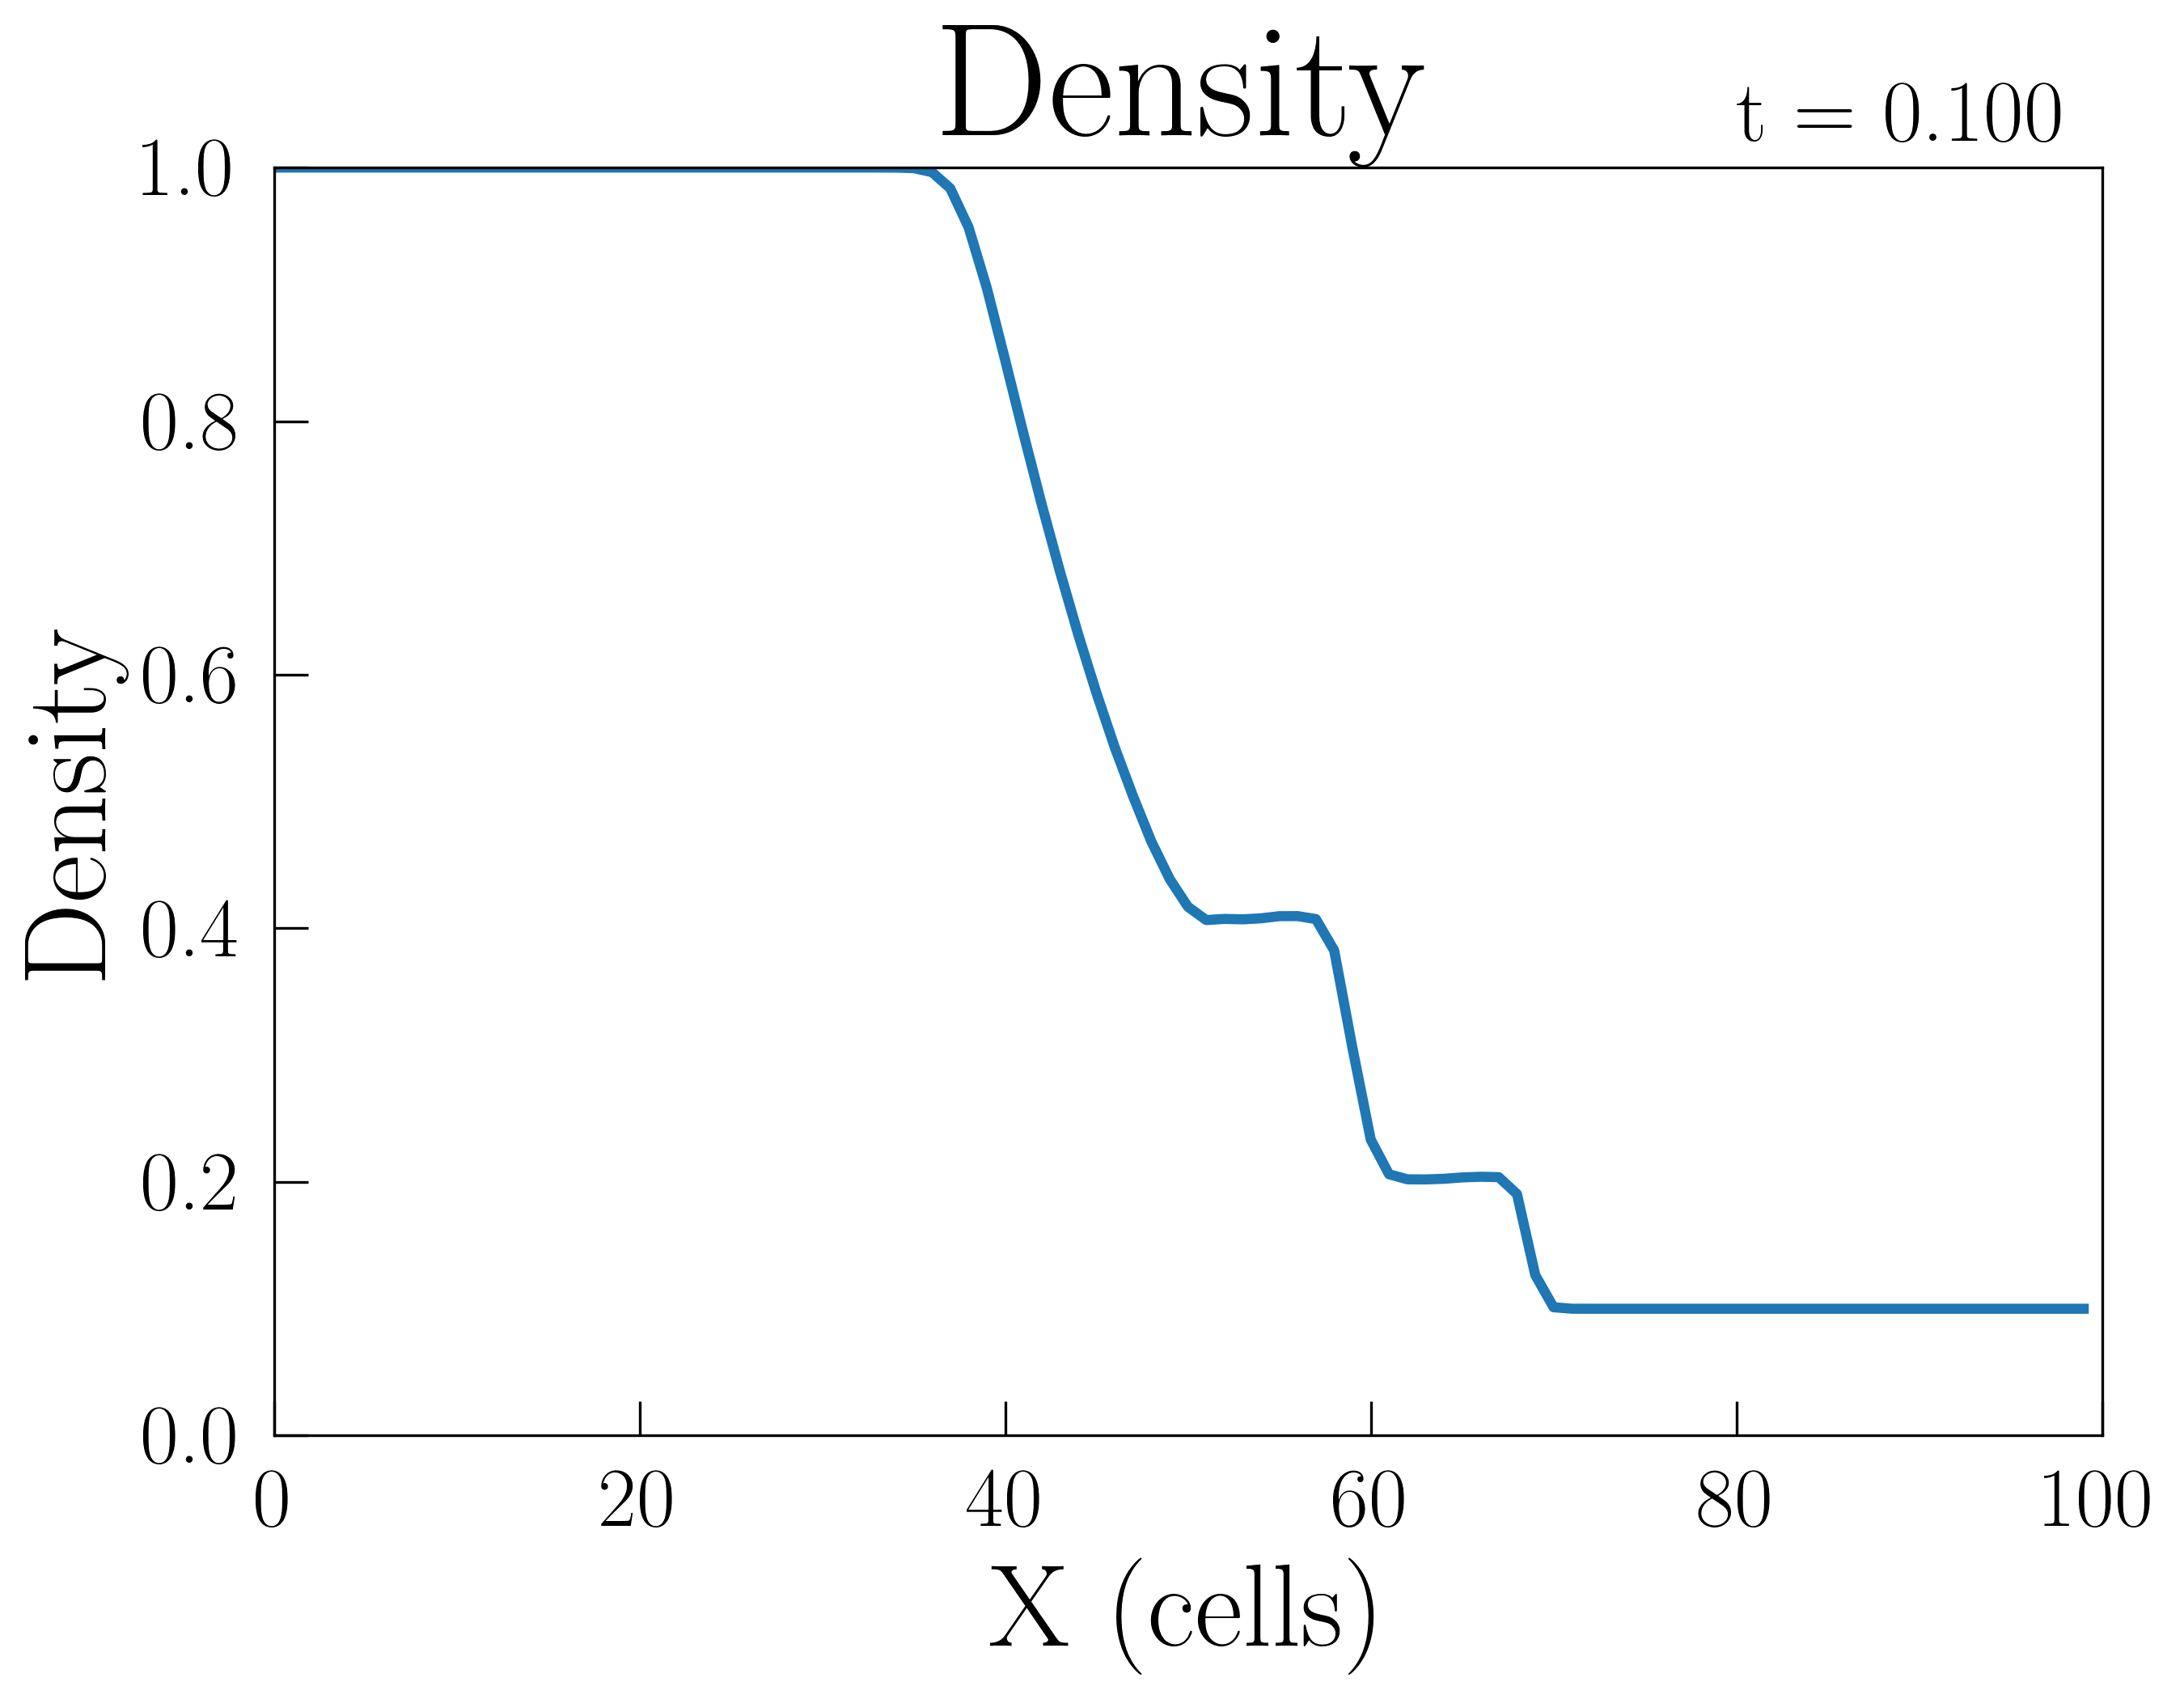

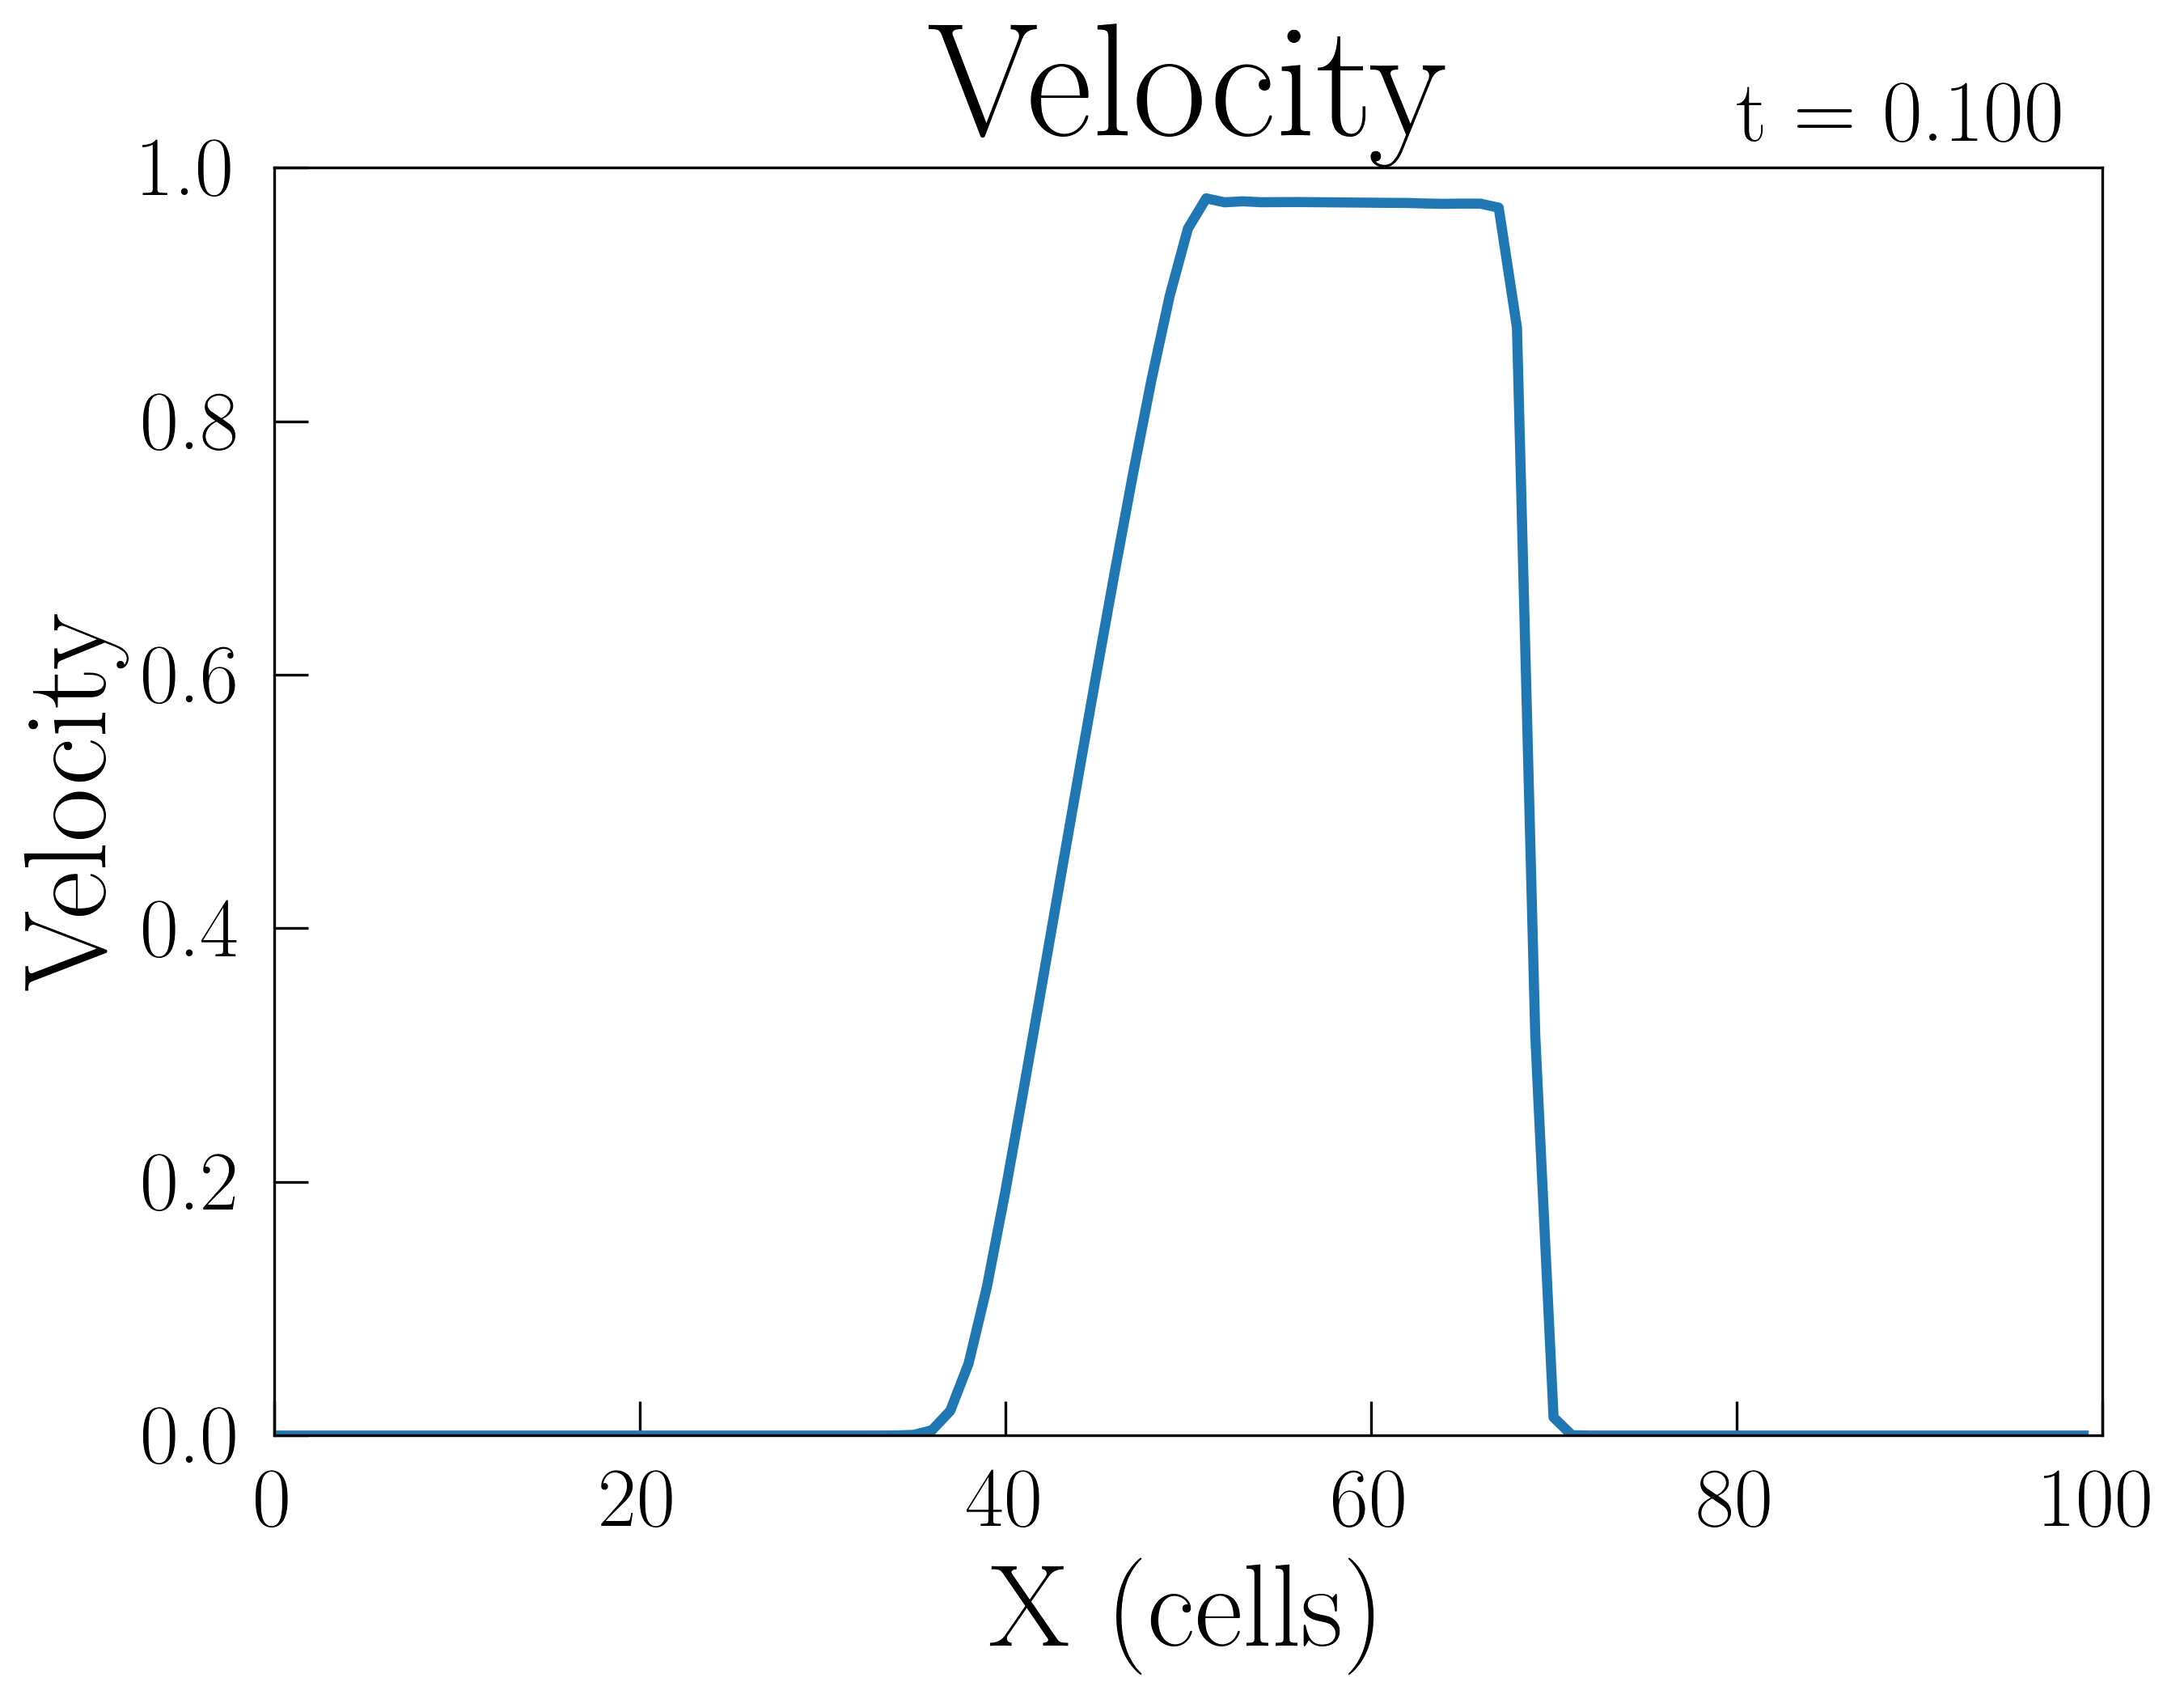

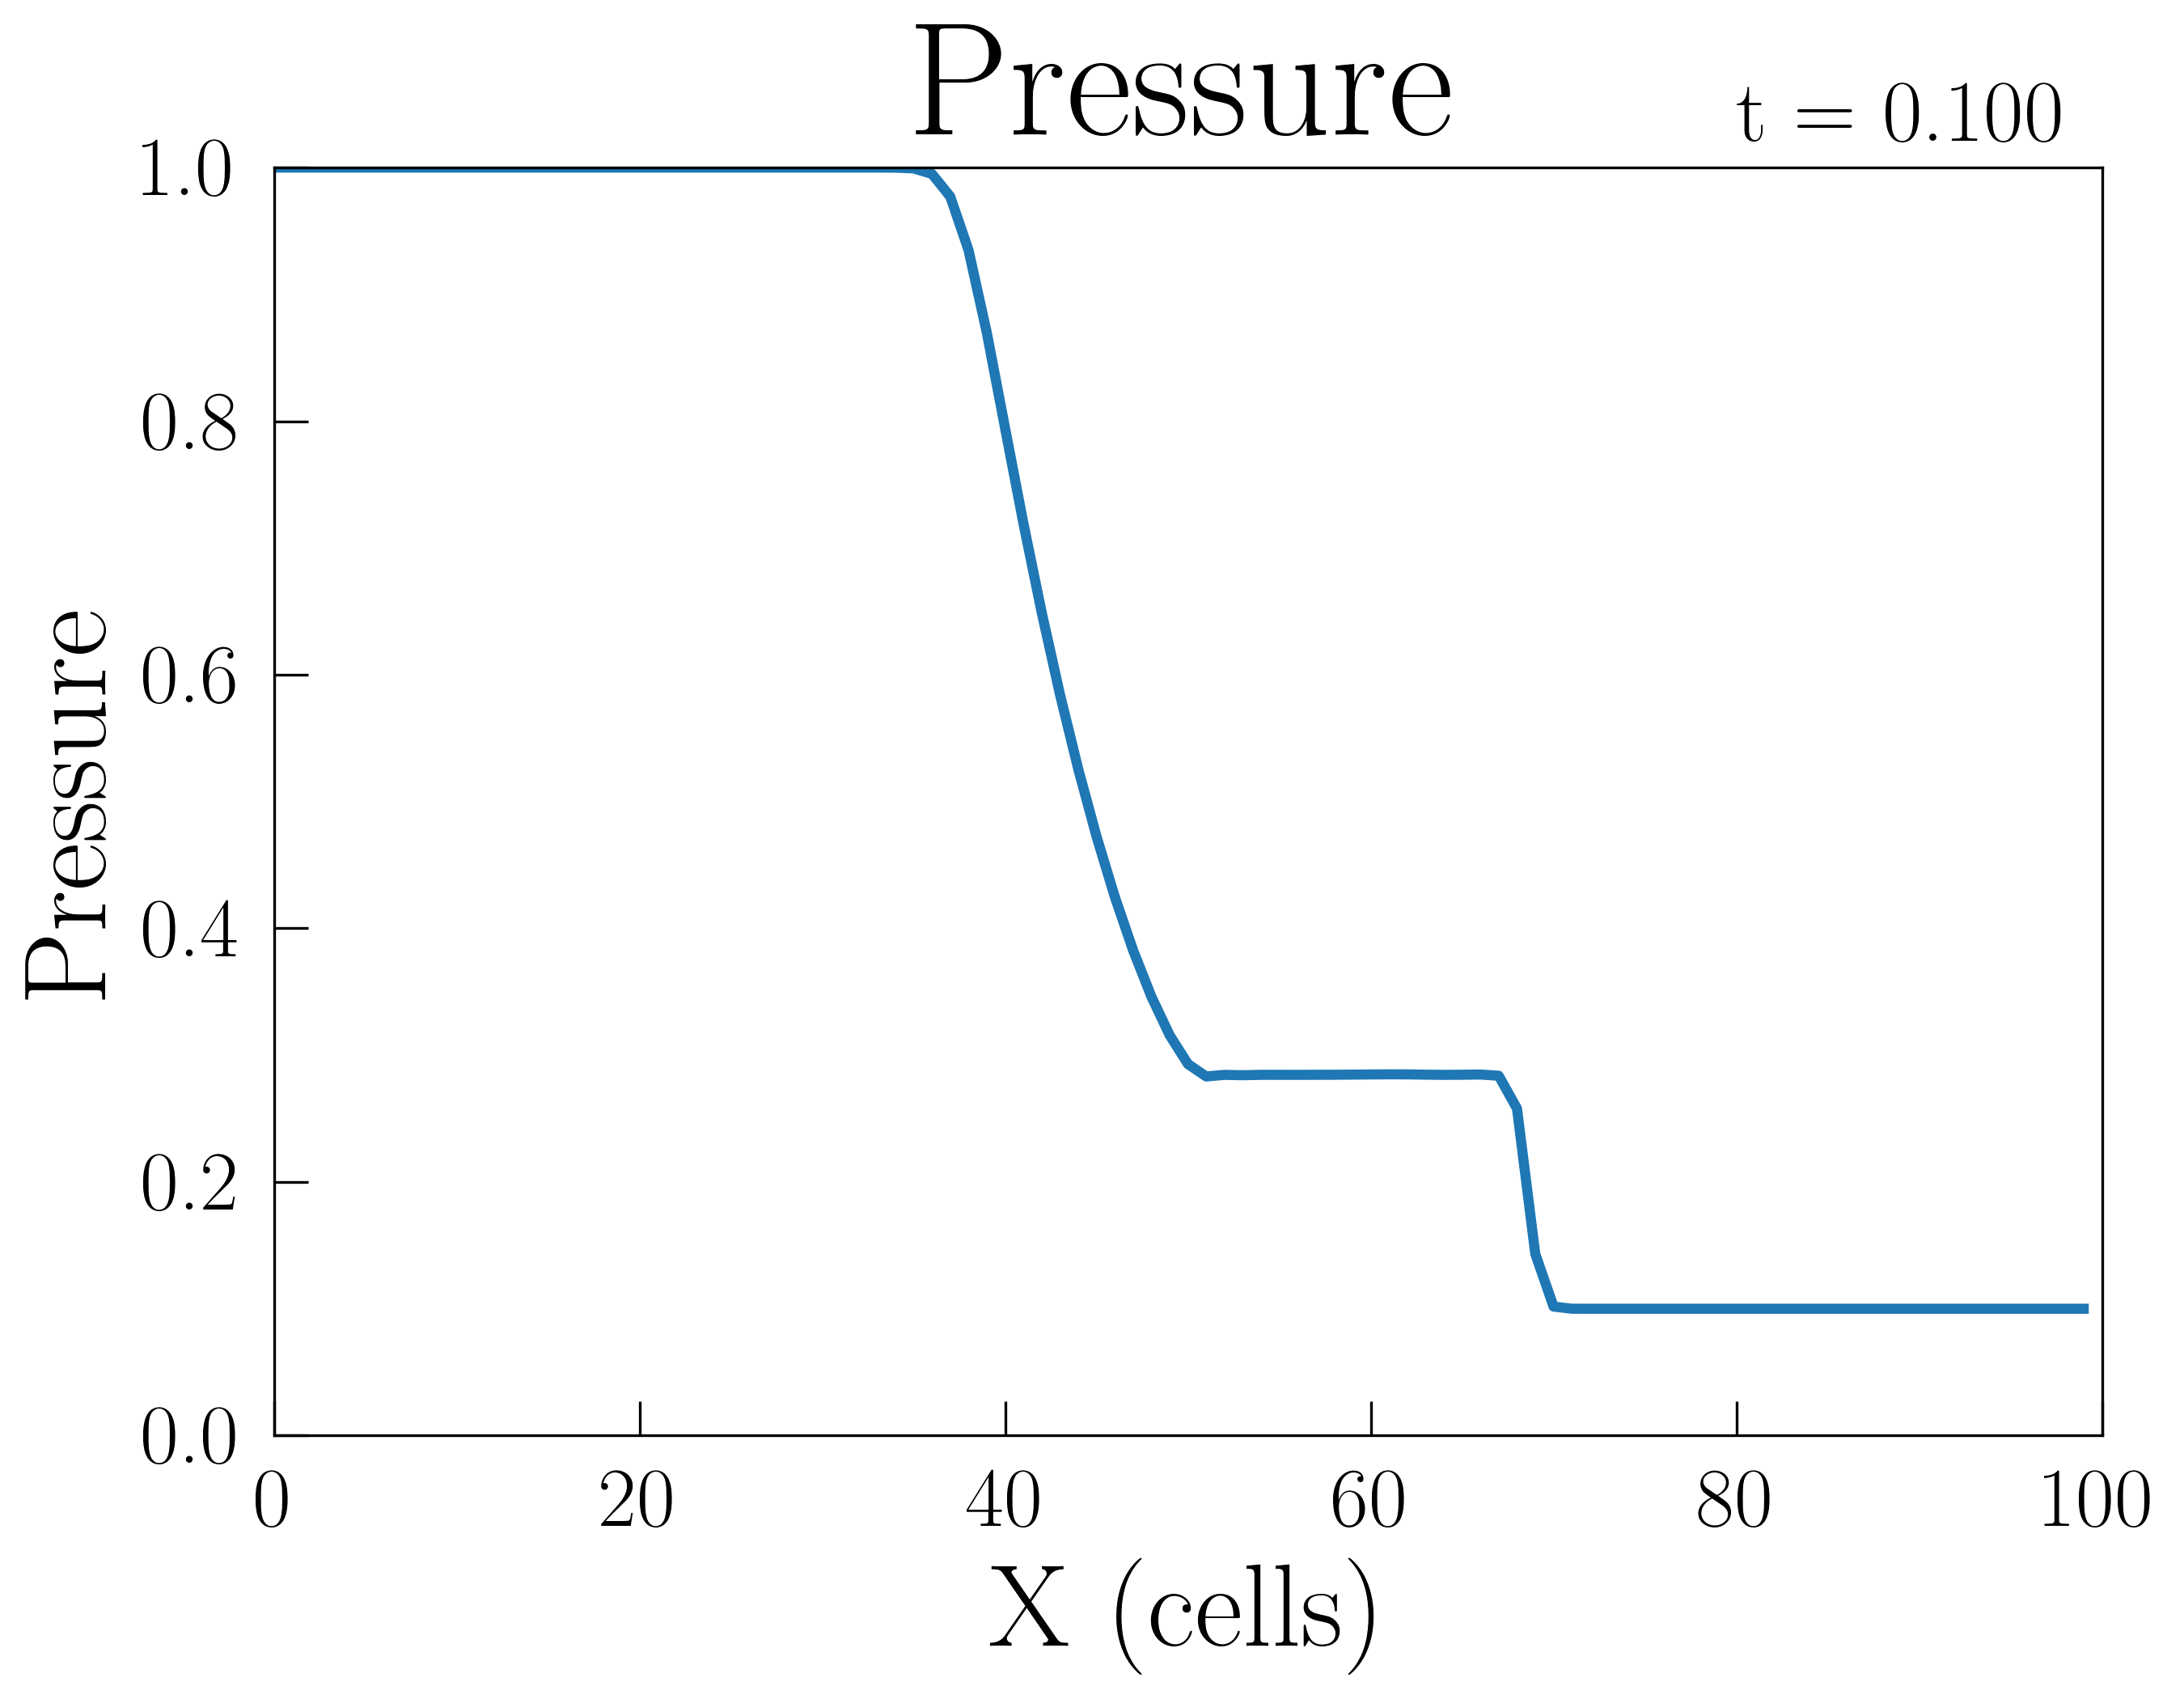

In [15]:
ch_viz.density(plt_kwargs)

ch_viz.velocity(plt_kwargs)

ch_viz.pressure(plt_kwargs)


### Y Value Formatting

default: reg1

| Run Name | Density | Velocity | Pressure |
| --- | --- | --- | --- |
| 123 | reg3 | reg3 | reg5 |
| blast | default | default | default |
| constant | default | default | default |
| sod | default | default | default |
| square_wave | default | default | default |
| strong_shock | default | default | default |
| trac_pen | default | default | default |
| two_shocks | default | default | default |


### Fig Size Formatting

Standalone plotting has its own figsize, and comparison functions have their own figsize. The Rayleigh Taylor comparison has a special figsize



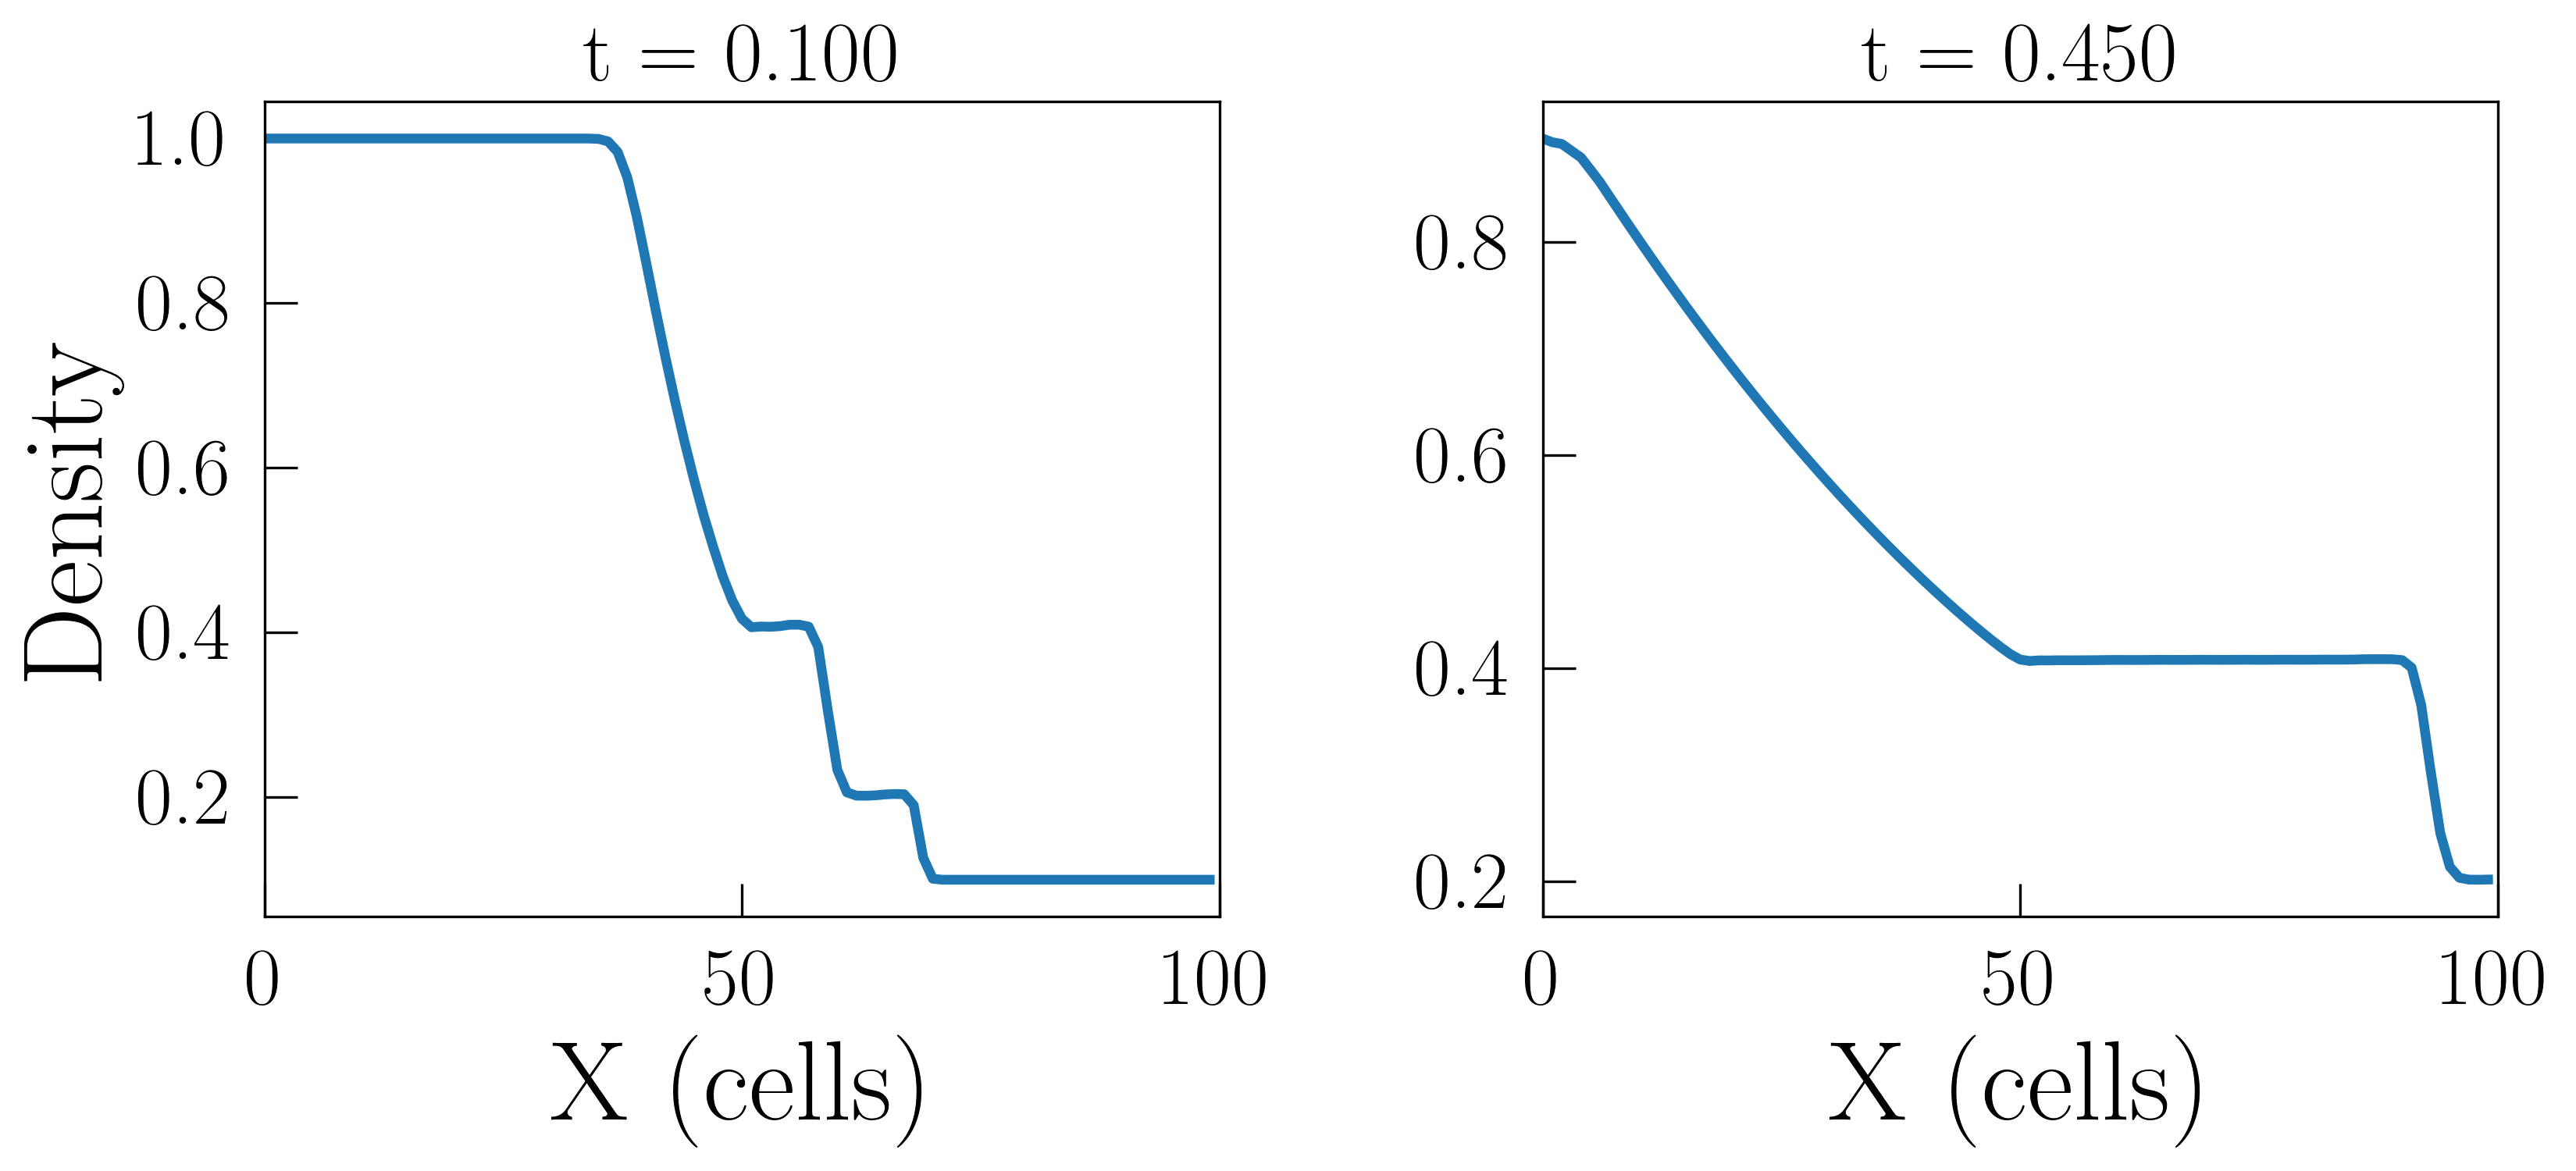

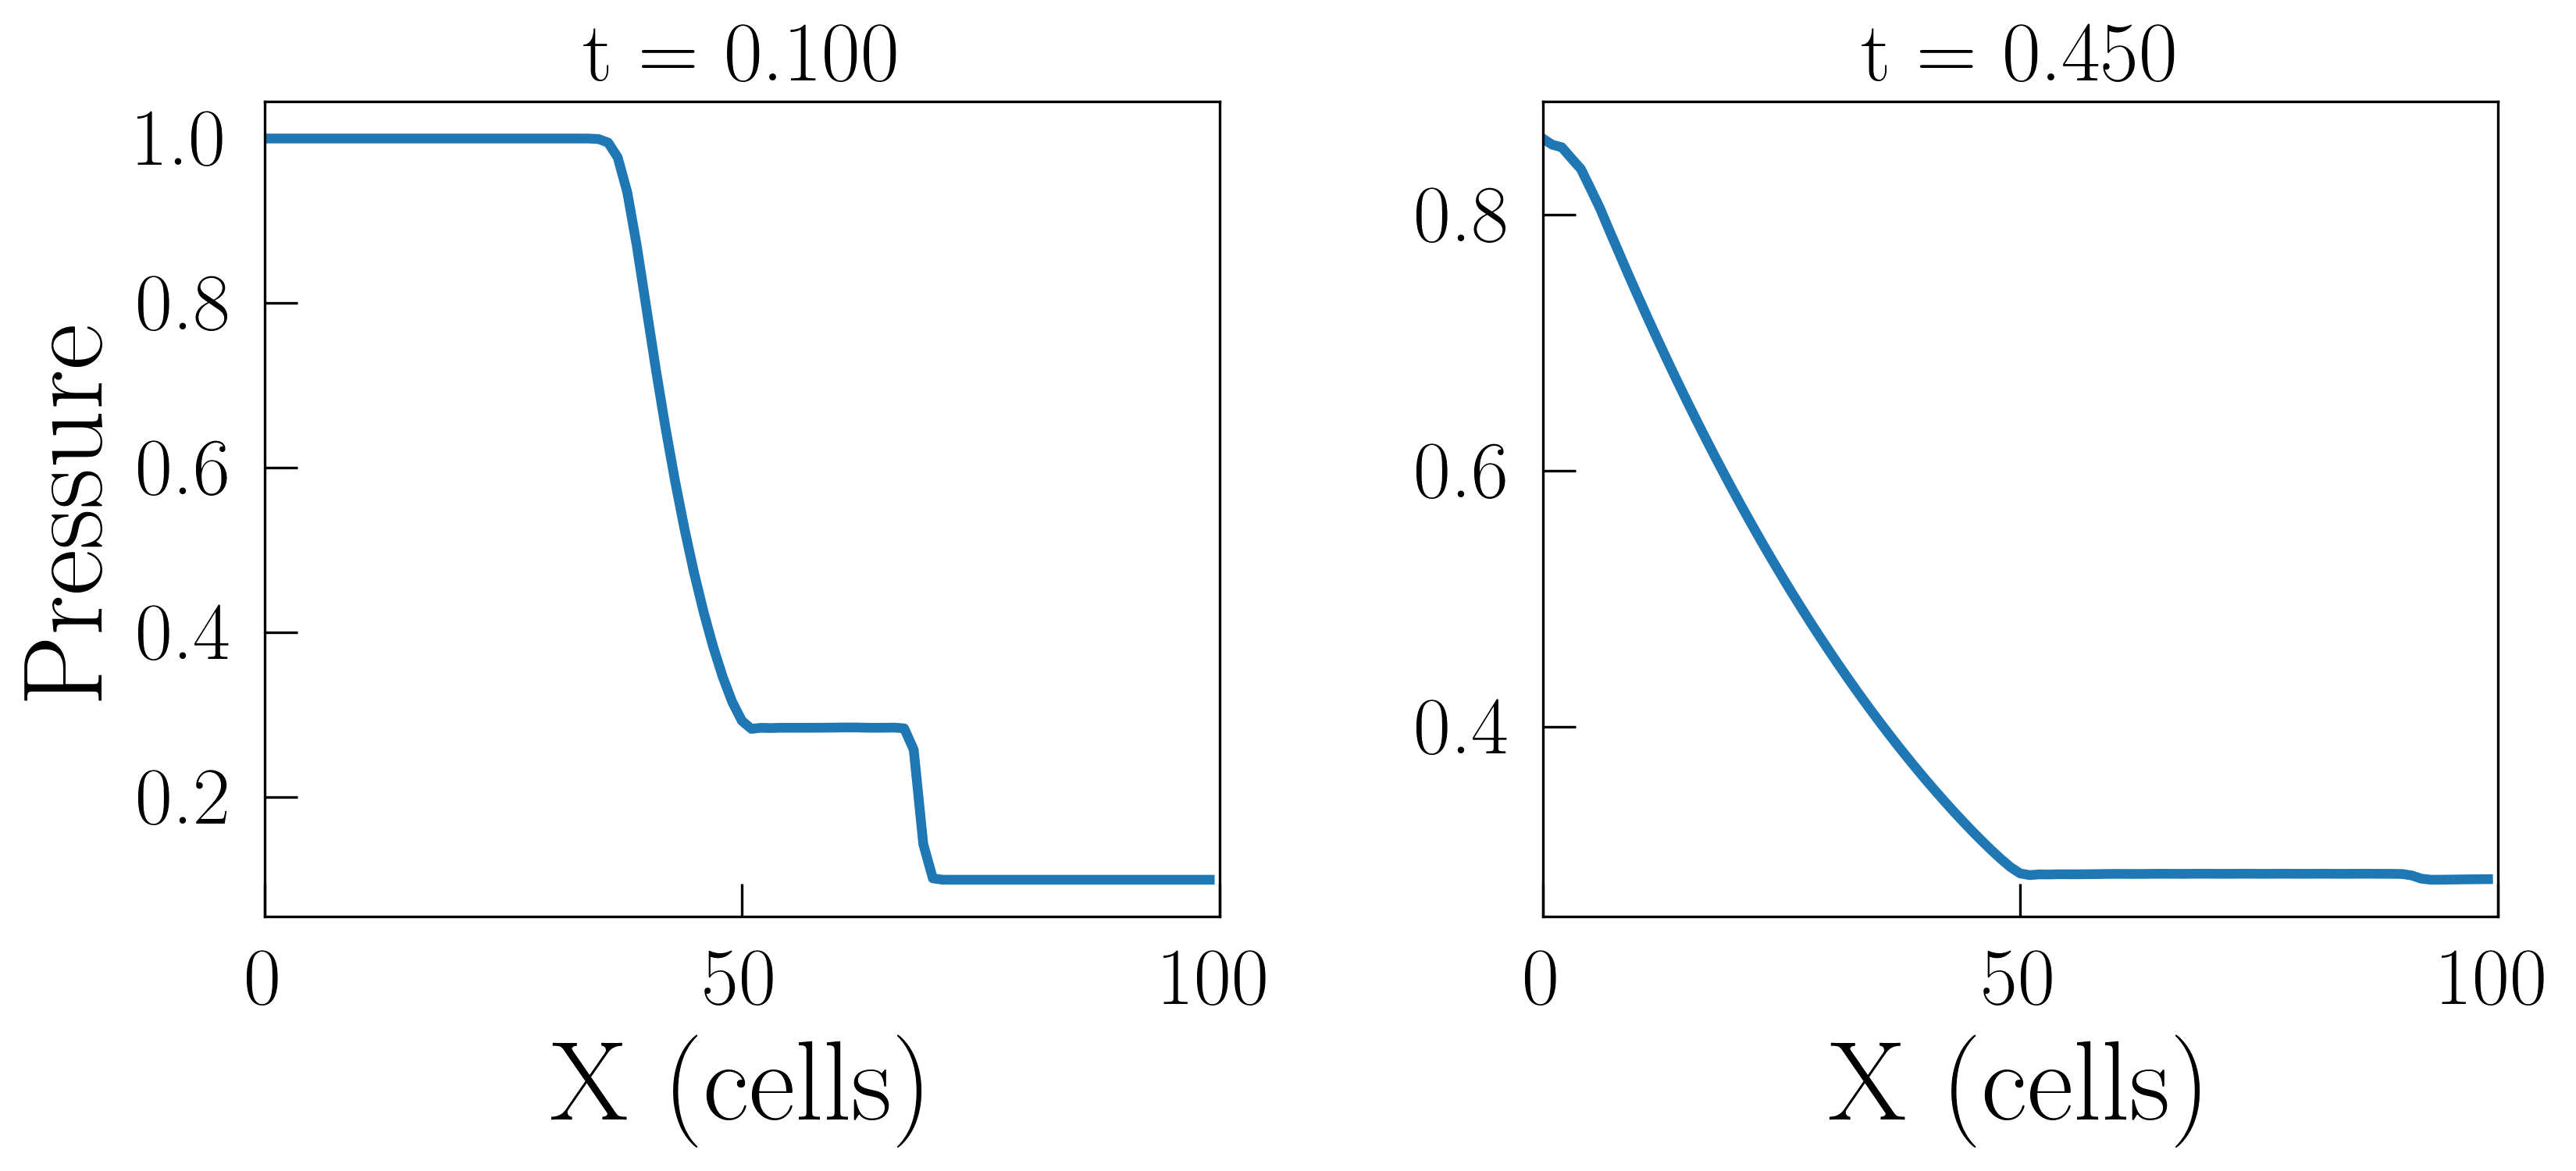

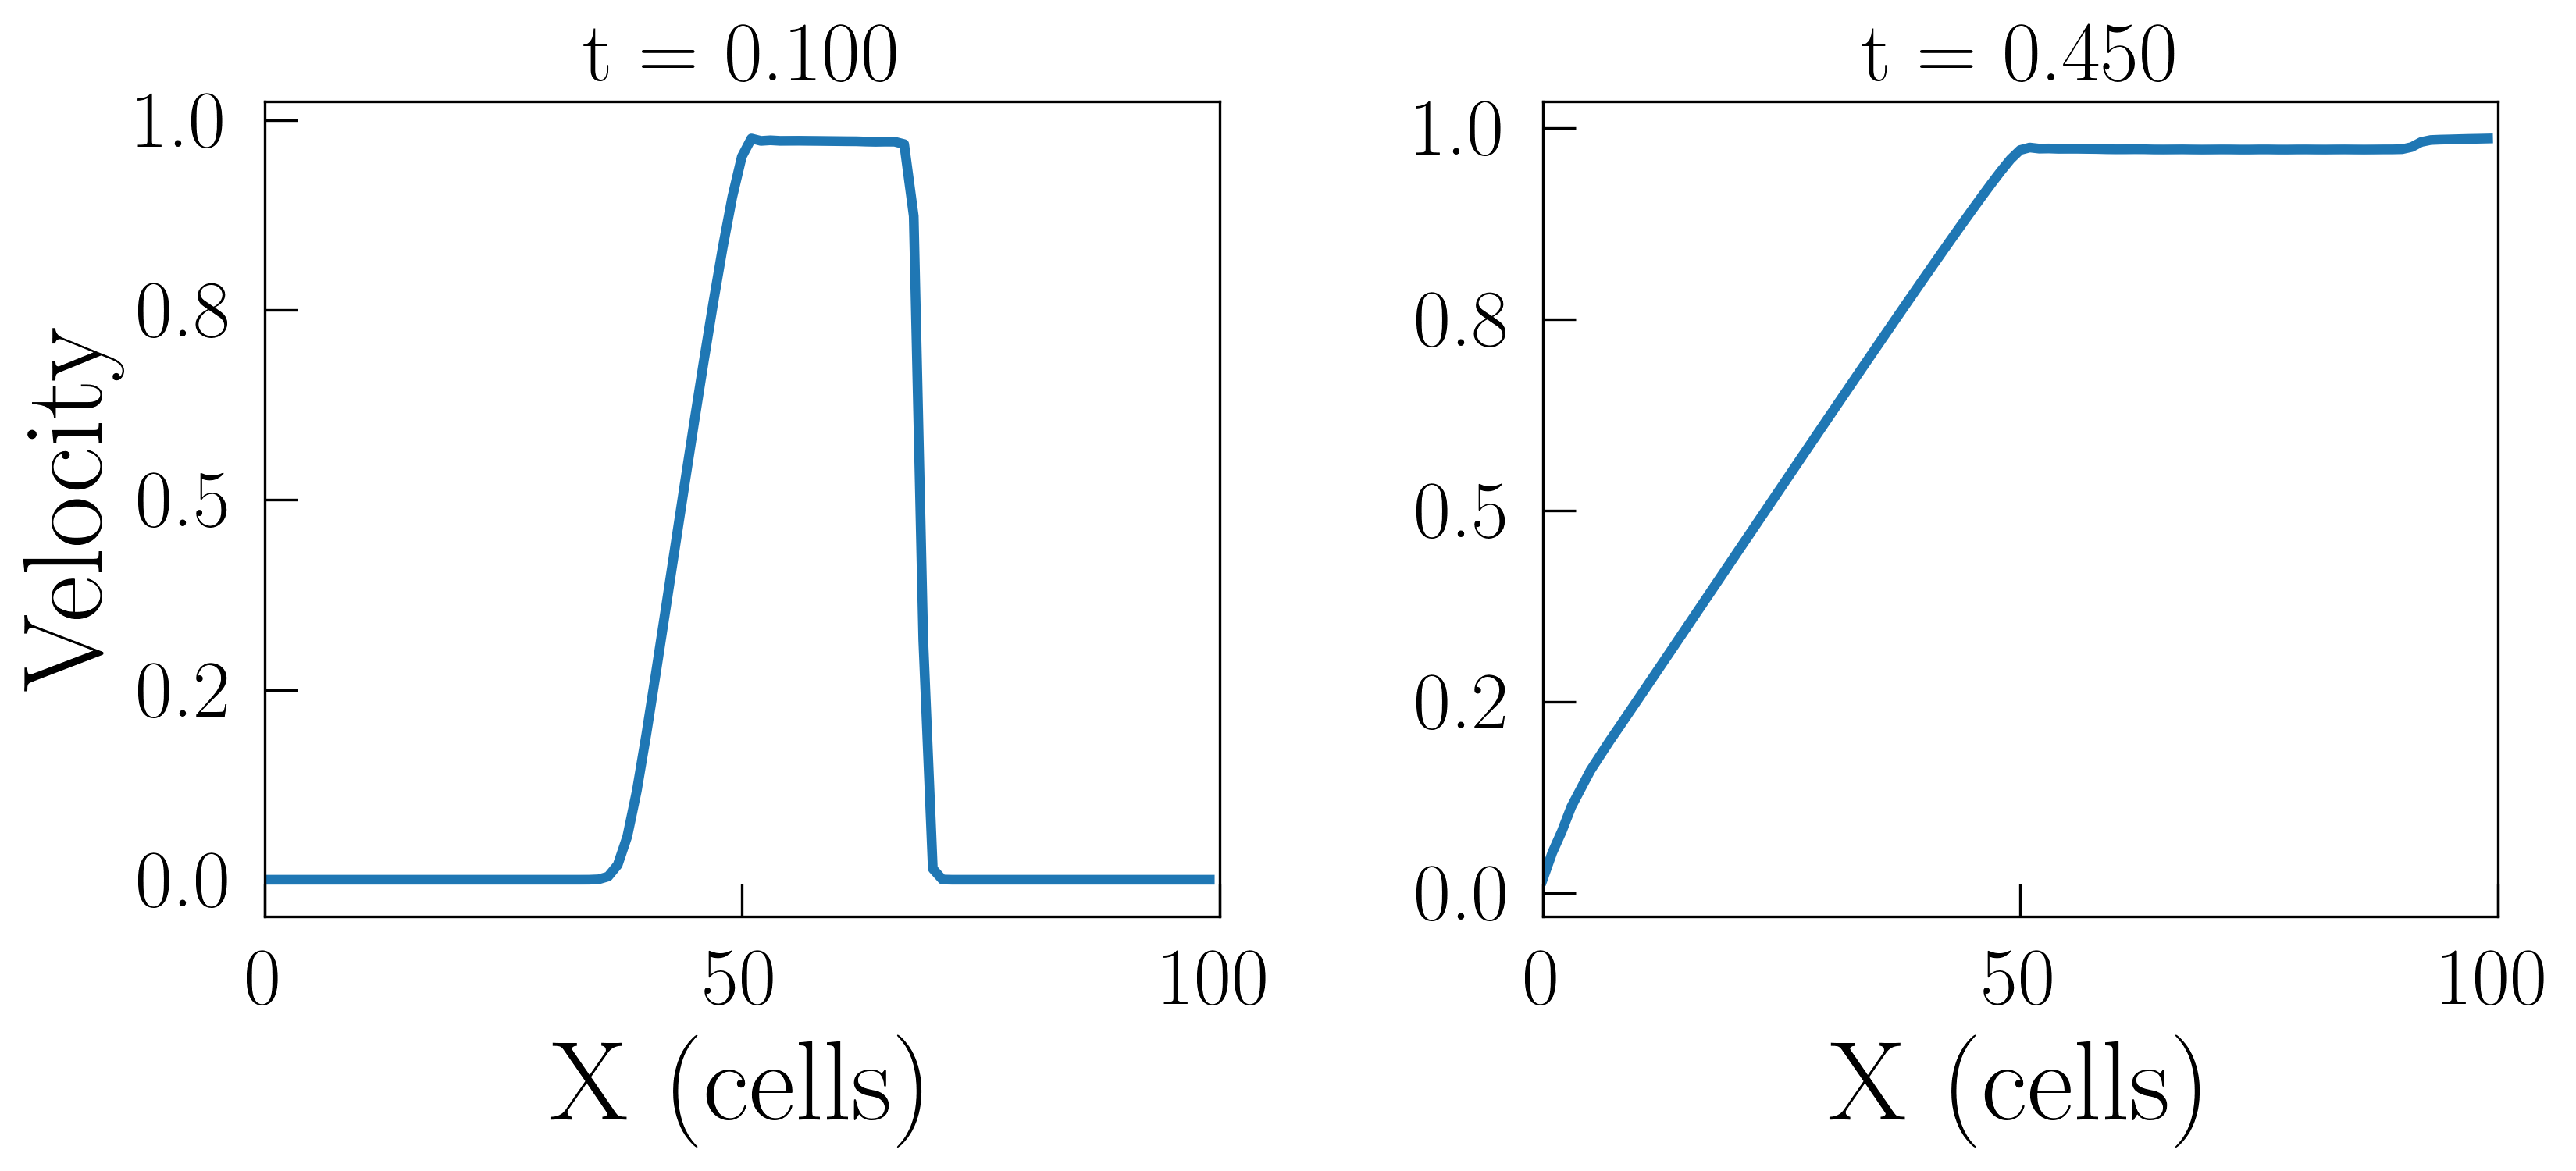

In [16]:
nSnap = 45

ch_snap2 = ch_run.createSnap(nSnap, keys, load_data=True, snap_head=True)
cholla_calcs = [velocity_calc, press_calc]
ch_snap2.calc_vals(cholla_calcs)

ch_viz.density_compare(ch_snap2)

ch_viz.pressure_compare(ch_snap2)

ch_viz.velocity_compare(ch_snap2)